In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import os
import math
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.4.1'

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train_all, y_train_all), (x_test, y_test) = mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28, 1)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28, 1)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28, 1)

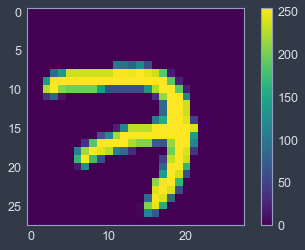

In [6]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

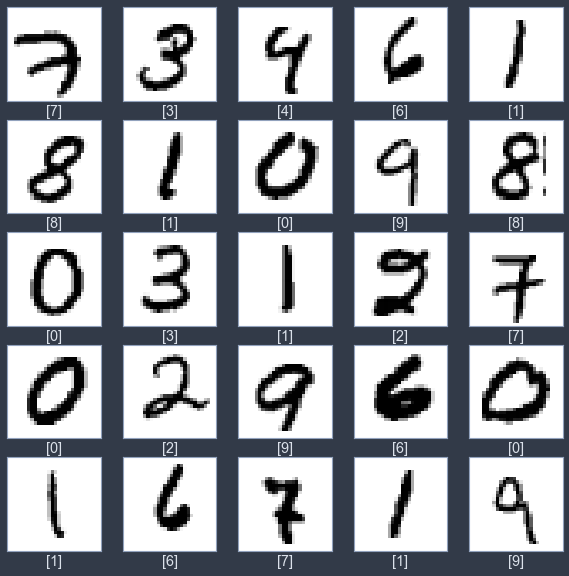

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel([y_train[i]])
plt.show()

In [9]:
from tensorflow.keras import datasets, layers, models
from tensorflow.keras import regularizers

In [9]:
# training model1
model1 = keras.models.Sequential()

model1.add(keras.layers.Conv2D(filters=16, kernel_size=5,padding='same',
                             activation='relu',input_shape=(28, 28, 1)))
model1.add(keras.layers.MaxPool2D(pool_size=2))

model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(128, activation='relu'))
model1.add(keras.layers.Dense(10, activation="softmax"))

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 403,242
Trainable params: 403,242
Non-trainable params: 0
_________________________________________________________________


In [10]:
model1.compile(loss="sparse_categorical_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])

In [11]:
history1 = model1.fit(x_train_scaled, y_train, epochs=60,
                    validation_data=(x_valid_scaled, y_valid))

Epoch 1/60
1719/1719 [==============================] - 16s 9ms/step - loss: 0.2906 - accuracy: 0.9099 - val_loss: 0.0646 - val_accuracy: 0.9802
Epoch 2/60
1719/1719 [==============================] - 14s 8ms/step - loss: 0.0523 - accuracy: 0.9830 - val_loss: 0.0521 - val_accuracy: 0.9842
Epoch 3/60
1719/1719 [==============================] - 15s 8ms/step - loss: 0.0320 - accuracy: 0.9901 - val_loss: 0.0457 - val_accuracy: 0.9878
Epoch 4/60
1719/1719 [==============================] - 14s 8ms/step - loss: 0.0220 - accuracy: 0.9926 - val_loss: 0.0410 - val_accuracy: 0.9894
Epoch 5/60
1719/1719 [==============================] - 14s 8ms/step - loss: 0.0156 - accuracy: 0.9950 - val_loss: 0.0487 - val_accuracy: 0.9858
Epoch 6/60
1719/1719 [==============================] - 14s 8ms/step - loss: 0.0131 - accuracy: 0.9961 - val_loss: 0.0475 - val_accuracy: 0.9882
Epoch 7/60
1719/1719 [==============================] - 14s 8ms/step - loss: 0.0099 - accuracy: 0.9968 - val_loss: 0.0616 - val_ac

1719/1719 [==============================] - 13s 8ms/step - loss: 0.0027 - accuracy: 0.9995 - val_loss: 0.1465 - val_accuracy: 0.9910
Epoch 58/60
1719/1719 [==============================] - 13s 8ms/step - loss: 5.3040e-04 - accuracy: 0.9997 - val_loss: 0.1595 - val_accuracy: 0.9888
Epoch 59/60
1719/1719 [==============================] - 13s 8ms/step - loss: 0.0040 - accuracy: 0.9994 - val_loss: 0.1567 - val_accuracy: 0.9902
Epoch 60/60
1719/1719 [==============================] - 13s 8ms/step - loss: 0.0018 - accuracy: 0.9997 - val_loss: 0.1611 - val_accuracy: 0.9884


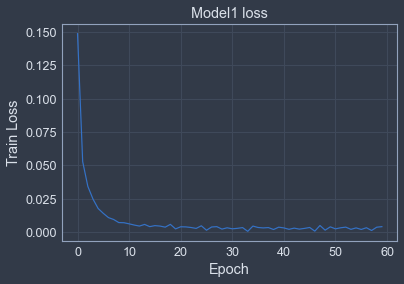

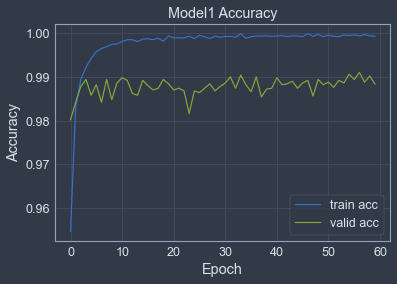

In [12]:
plt.plot(history1.history['loss'])
plt.title('Model1 loss')
plt.ylabel('Train Loss')
plt.xlabel('Epoch')
plt.show()

plt.plot(history1.history['accuracy'], label = 'train acc')
plt.plot(history1.history['val_accuracy'], label = 'valid acc')
plt.title('Model1 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [13]:
# training model2
model2 = keras.models.Sequential()

model2.add(keras.layers.Conv2D(filters=16, kernel_size=5,padding='same',
                             activation='relu',input_shape=(28, 28, 1)))
model2.add(keras.layers.MaxPool2D(pool_size=2))

model2.add(keras.layers.Conv2D(64,5,padding='same',activation='relu'))
model2.add(keras.layers.MaxPool2D(pool_size=2))

model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(128, activation='relu'))
model2.add(keras.layers.Dense(10, activation="softmax"))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        25664     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               401536    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [14]:
model2.compile(loss="sparse_categorical_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])

In [15]:
history2 = model2.fit(x_train_scaled, y_train, epochs=60,
                    validation_data=(x_valid_scaled, y_valid))

Epoch 1/60
1719/1719 [==============================] - 35s 20ms/step - loss: 0.2508 - accuracy: 0.9221 - val_loss: 0.0497 - val_accuracy: 0.9852
Epoch 2/60
1719/1719 [==============================] - 35s 20ms/step - loss: 0.0421 - accuracy: 0.9863 - val_loss: 0.0385 - val_accuracy: 0.9878
Epoch 3/60
1719/1719 [==============================] - 36s 21ms/step - loss: 0.0254 - accuracy: 0.9919 - val_loss: 0.0335 - val_accuracy: 0.9892
Epoch 4/60
1719/1719 [==============================] - 35s 20ms/step - loss: 0.0175 - accuracy: 0.9947 - val_loss: 0.0392 - val_accuracy: 0.9888
Epoch 5/60
1719/1719 [==============================] - 35s 21ms/step - loss: 0.0129 - accuracy: 0.9957 - val_loss: 0.0431 - val_accuracy: 0.9878
Epoch 6/60
1719/1719 [==============================] - 31s 18ms/step - loss: 0.0115 - accuracy: 0.9965 - val_loss: 0.0308 - val_accuracy: 0.9910
Epoch 7/60
1719/1719 [==============================] - 31s 18ms/step - loss: 0.0082 - accuracy: 0.9976 - val_loss: 0.0385 -

Epoch 57/60
1719/1719 [==============================] - 27s 16ms/step - loss: 0.0056 - accuracy: 0.9993 - val_loss: 0.1636 - val_accuracy: 0.9910
Epoch 58/60
1719/1719 [==============================] - 27s 16ms/step - loss: 9.9722e-04 - accuracy: 0.9996 - val_loss: 0.1821 - val_accuracy: 0.9912
Epoch 59/60
1719/1719 [==============================] - 27s 16ms/step - loss: 0.0051 - accuracy: 0.9991 - val_loss: 0.2130 - val_accuracy: 0.9914
Epoch 60/60
1719/1719 [==============================] - 27s 16ms/step - loss: 0.0049 - accuracy: 0.9995 - val_loss: 0.2313 - val_accuracy: 0.9910


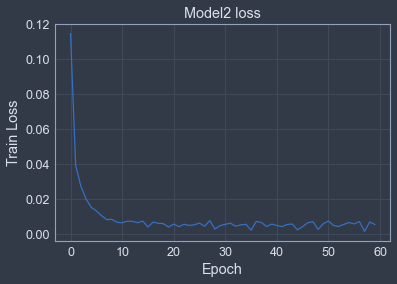

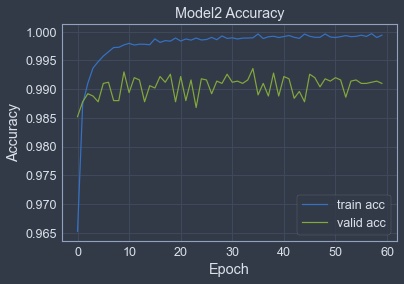

In [16]:
plt.plot(history2.history['loss'])
plt.title('Model2 loss')
plt.ylabel('Train Loss')
plt.xlabel('Epoch')
plt.show()

plt.plot(history2.history['accuracy'], label = 'train acc')
plt.plot(history2.history['val_accuracy'], label = 'valid acc')
plt.title('Model2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [17]:
# training model3
model3 = keras.models.Sequential()

model3.add(keras.layers.Conv2D(filters=16, kernel_size=5,padding='same',
                             activation='relu',input_shape=(28, 28, 1)))
model3.add(keras.layers.MaxPool2D(pool_size=2))

model3.add(keras.layers.Flatten())
model3.add(keras.layers.Dense(130, activation='relu'))
model3.add(keras.layers.Dense(50, activation='relu'))
model3.add(keras.layers.Dense(10, activation="softmax"))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 130)               407810    
_________________________________________________________________
dense_5 (Dense)              (None, 50)                6550      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                510       
Total params: 415,286
Trainable params: 415,286
Non-trainable params: 0
________________________________________________

In [18]:
model3.compile(loss="sparse_categorical_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])

In [19]:
history3 = model3.fit(x_train_scaled, y_train, epochs=60,
                    validation_data=(x_valid_scaled, y_valid))

Epoch 1/60
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2993 - accuracy: 0.9061 - val_loss: 0.0625 - val_accuracy: 0.9796
Epoch 2/60
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0570 - accuracy: 0.9818 - val_loss: 0.0551 - val_accuracy: 0.9838
Epoch 3/60
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0345 - accuracy: 0.9887 - val_loss: 0.0506 - val_accuracy: 0.9838
Epoch 4/60
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0244 - accuracy: 0.9923 - val_loss: 0.0467 - val_accuracy: 0.9878
Epoch 5/60
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0182 - accuracy: 0.9947 - val_loss: 0.0463 - val_accuracy: 0.9870
Epoch 6/60
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0170 - accuracy: 0.9943 - val_loss: 0.0558 - val_accuracy: 0.9868
Epoch 7/60
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0129 - accuracy: 0.9958 - val_loss: 0.0505 - val_accuracy

1719/1719 [==============================] - 9s 5ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.1719 - val_accuracy: 0.9870
Epoch 58/60
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0055 - accuracy: 0.9989 - val_loss: 0.1791 - val_accuracy: 0.9892
Epoch 59/60
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.1929 - val_accuracy: 0.9874
Epoch 60/60
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0035 - accuracy: 0.9994 - val_loss: 0.1831 - val_accuracy: 0.9880


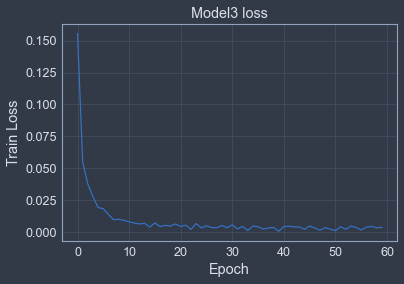

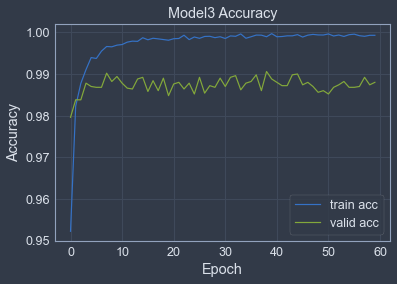

In [20]:
plt.plot(history3.history['loss'])
plt.title('Model3 loss')
plt.ylabel('Train Loss')
plt.xlabel('Epoch')
plt.show()

plt.plot(history3.history['accuracy'], label = 'train acc')
plt.plot(history3.history['val_accuracy'], label = 'valid acc')
plt.title('Model3 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

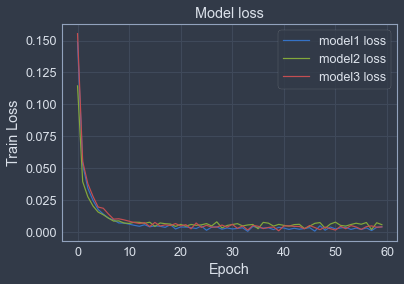

In [21]:
#Plot the training loss of all models
plt.title('Model loss')
plt.ylabel('Train Loss')
plt.xlabel('Epoch')
plt.plot(history1.history['loss'], label = 'model1 loss' )
plt.plot(history2.history['loss'], label = 'model2 loss' )
plt.plot(history3.history['loss'], label = 'model3 loss' )
plt.legend(loc = 'best')
plt.savefig("CNN_MNIST_loss.png")

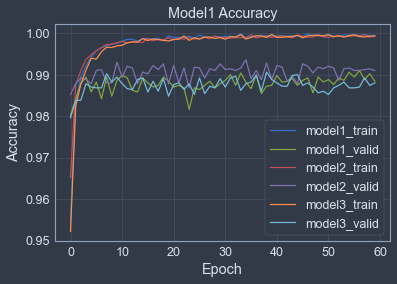

In [22]:
#Plot the accuracy of all models
plt.title('Model1 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(history1.history['accuracy'], label = 'model1_train')
plt.plot(history1.history['val_accuracy'], label = 'model1_valid')
plt.plot(history2.history['accuracy'], label = 'model2_train')
plt.plot(history2.history['val_accuracy'], label = 'model2_valid')
plt.plot(history3.history['accuracy'], label = 'model3_train')
plt.plot(history3.history['val_accuracy'], label = 'model3_valid')
plt.legend()
plt.savefig("CNN_MNIST_acc.png")